In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split


data = pd.read_csv('impression_300_llm.csv')
train_data, eval_data = train_test_split(data, test_size=30, random_state=42)



In [2]:
data.head()

,Report Name,History,Observation,Impression
0,MRI Brain Plain,LOC,Possible minimal volume loss of right hippocam...,Possible minimal volume loss of right hippocam...
1,MRI Orbits Plain and Contrast,document attached,The globe is normal shape. The uveoscleral thi...,Minimally increased perineural CSF signal alon...
2,MRI Brain Plain and Contrast,document attached,"No evidence of acute infarct, hemorrhage or sp...",No significant neuroparenchymal abnormality d...
3,MRI Brain Plain and Contrast,HEADACHE,Limited study due to phase encoded pulsation a...,Small vessel ischaemic disease (Fazekas grade ...
4,CT Abdomen & Pelvis Plain and Contrast - Female,PAIN IN RT SIDED UPPER ABDOMEN,The liver is normal sized. Focal fatty infiltr...,Prominently distended gallbladder. No calcifie...


In [3]:
data["Report Name"].count()

330

In [4]:
data.size

1320

In [5]:
data["History"].size

330

In [6]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


nltk.download('stopwords')
nltk.download('wordnet')



stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    words = [stemmer.stem(word) for word in words]  # Apply stemming
    words = [lemmatizer.lemmatize(word) for word in words]  # Apply lemmatization
    return ' '.join(words)


data['processed_text'] = data[['Report Name', 'History', 'Observation']].astype(str).agg(' '.join, axis=1).apply(preprocess_text)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
data.head()

,Report Name,History,Observation,Impression,processed_text
0,MRI Brain Plain,LOC,Possible minimal volume loss of right hippocam...,Possible minimal volume loss of right hippocam...,mri brain plain loc possibl minim volum loss r...
1,MRI Orbits Plain and Contrast,document attached,The globe is normal shape. The uveoscleral thi...,Minimally increased perineural CSF signal alon...,mri orbit plain contrast document attach globe...
2,MRI Brain Plain and Contrast,document attached,"No evidence of acute infarct, hemorrhage or sp...",No significant neuroparenchymal abnormality d...,mri brain plain contrast document attach evid ...
3,MRI Brain Plain and Contrast,HEADACHE,Limited study due to phase encoded pulsation a...,Small vessel ischaemic disease (Fazekas grade ...,mri brain plain contrast headach limit studi d...
4,CT Abdomen & Pelvis Plain and Contrast - Female,PAIN IN RT SIDED UPPER ABDOMEN,The liver is normal sized. Focal fatty infiltr...,Prominently distended gallbladder. No calcifie...,ct abdomen & pelvi plain contrast - femal pain...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(data['processed_text'].tolist())


svd = TruncatedSVD(n_components=300)
embeddings = svd.fit_transform(tfidf_matrix)


In [9]:
from sklearn.metrics.pairwise import cosine_similarity


similarity_matrix = cosine_similarity(tfidf_matrix.T)  # Transpose to get word vectors


feature_names = tfidf.get_feature_names_out()


pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        pairs.append((feature_names[i], feature_names[j], similarity_matrix[i, j]))


sorted_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)


top_100_pairs = sorted_pairs[:100]


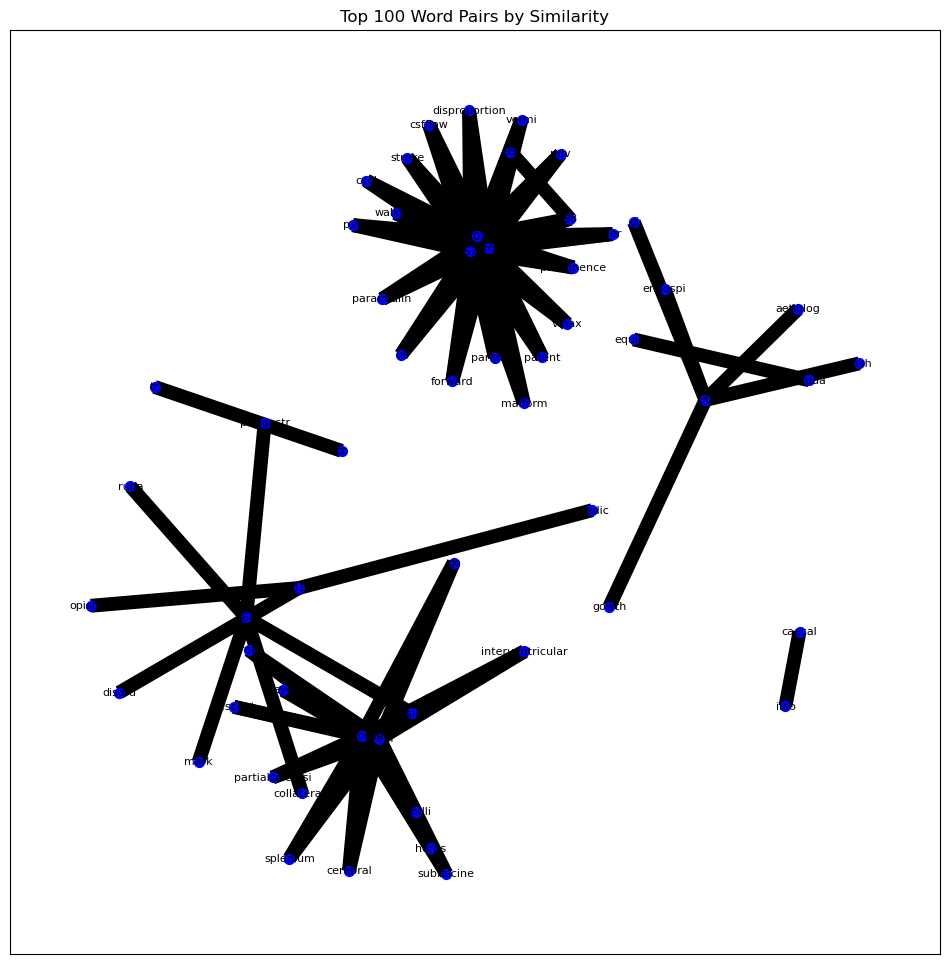

In [10]:
import matplotlib.pyplot as plt
import networkx as nx


G = nx.Graph()

for word1, word2, similarity in top_100_pairs:
    G.add_edge(word1, word2, weight=similarity)


pos = nx.spring_layout(G, k=0.5)


plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] * 10 for u, v in G.edges()])
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")


plt.title('Top 100 Word Pairs by Similarity')
plt.show()


In [11]:
pip install pyvis


Note: you may need to restart the kernel to use updated packages.


In [12]:
# Convert text into TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(data['processed_text'].tolist())


similarity_matrix = cosine_similarity(tfidf_matrix.T)  # Transpose to get word vectors


feature_names = tfidf.get_feature_names_out()


pairs = []
for i in range(len(feature_names)):
    for j in range(i+1, len(feature_names)):
        pairs.append((feature_names[i], feature_names[j], similarity_matrix[i, j]))


sorted_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)


top_100_pairs = sorted_pairs[:100]




In [13]:
import codecs
from pyvis.network import Network

# Function to write HTML with utf-8 encoding
def write_html_utf8(self, name, local=True, notebook=False, open_browser=False):
    getcwd_name = name
    if self.cdn_resources == "in_line" or self.cdn_resources == "remote":
        with codecs.open(getcwd_name, "w+", "utf-8") as out:
            out.write(self.html)
    else:
        raise ValueError("Unsupported cdn_resources value.")

# Patch the pyvis method to avoid re-importing the library
Network.write_html = write_html_utf8

# Create a Pyvis network graph
net = Network(notebook=True, height="750px", width="100%", bgcolor="#222222", font_color="white", cdn_resources='remote')

# Add nodes and edges to the graph (assuming top_100_pairs is defined)
for word1, word2, similarity in top_100_pairs:
    net.add_node(word1, label=word1)
    net.add_node(word2, label=word2)
    net.add_edge(word1, word2, value=similarity * 10)

# Generate and show the interactive graph with the UTF-8 patch applied
net.show("word_similarity_network.html")


word_similarity_network.html
